<a href="https://colab.research.google.com/github/nyamskamau/Moringa-Colab-Notebooks/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2020_09_Roselynn_Kamau_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

##Bonus Questions (Optional)

1. What is the most popular hour for returning cars?
2. What station is the most popular?
    *   Overall?
    *   At the most popular picking hour?
3. What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
      *   Overall?
      *   At the most popular picking hour?
4.Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 



# **Data Preparation**

The first step here involved importing the required libraries.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline

The next step involved importing the dataset used during the analysis and previewing the data and finally  accessing the information on the datatypes of the columns in the dataset.


In [10]:
df = pd.read_csv('Autolib.csv')

In [11]:
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
df.shape

(5000, 25)

# **Data Cleaning**
  
  The data cleaning process was undertaken in steps.






















### **i. Validity**
*   In checking the validity of the data , the first step included dropping columns that were irrelevant to our study.
*   In this case the columns were :

      *   *Displayed comment* , which contained null values
      *   *Scheduled at* , which contained null values
      *   *Charging Status* ,which was not important in our analysis
      *   *Charge Slots*  , which did not contain information that was useful in this analysis
      *   *Subscription Status* , which was not important in our analysis
      *   *Status* , which did not contain information that was useful in the analysis
      *   *Geo point* which did not contain information useful to the analysis
      *   *Public Name* as we already had the ID column to help us identify the stations.
      *   *Station type* as it did not contain information that was useful in our study.
      *   *Address* as we had the postal code and Id columns already to help us identify the stations
      *   *Kind* as it was not important in the analysis.
      *   *Rental status* as it did not contain any information useful to this analysis.
      *   *Cars* as it was redundant due to the Blue counter car column that contained the same information.
      


In [12]:
df.drop(['Displayed comment' ,'Cars','Address','Kind','Scheduled at','Charging Status' ,'Charge Slots' , 'Subscription status' ,'Status','Geo point','Public name', 'Station type'],axis=1,inplace=True)

After carrying out this process wthe following columns are the ones we used in the analysis.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Bluecar counter     5000 non-null   int64 
 1   Utilib counter      5000 non-null   int64 
 2   Utilib 1.4 counter  5000 non-null   int64 
 3   City                5000 non-null   object
 4   ID                  5000 non-null   object
 5   Postal code         5000 non-null   int64 
 6   Rental status       5000 non-null   object
 7   Slots               5000 non-null   int64 
 8   year                5000 non-null   int64 
 9   month               5000 non-null   int64 
 10  day                 5000 non-null   int64 
 11  hour                5000 non-null   int64 
 12  minute              5000 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 507.9+ KB


###  **ii. Accuracy.**

  *   In checking the accuracy of the data ie that the 
information in the respective columns meets the standards and is accurate. Here we need to check that
      *   The values recorded in the *Bluecar counter*  range between  [0-7] as stated in the data description
      *   The *Utilib counter* values range between [0 - 4]
      *   The values recorded in the *Utilib 1.4 counter* column range between [0 - 5] as stated in the description.



In [14]:
df.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Postal code,Rental status,Slots,year,month,day,hour,minute
0,0,0,0,Paris,paris-suffren-2,75015,operational,2,2018,4,8,11,43
1,6,0,0,Paris,paris-raymondlosserand-145,75014,operational,0,2018,4,6,7,24
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,operational,1,2018,4,3,20,14
3,3,1,0,Paris,paris-eugeneoudine-51,75013,operational,2,2018,4,4,4,37
4,3,0,0,Paris,paris-portedechamperret-6,75017,operational,3,2018,4,8,17,23


In [ ]:
df['Slots'].unique()

array([2, 0, 1, 3, 4, 6, 5, 7])

In [ ]:
df['Bluecar counter'].unique()

array([0, 6, 3, 1, 5, 4, 2, 7])

In [ ]:
df['Utilib counter'].unique()

array([0, 1, 2])

In [ ]:
df['Utilib 1.4 counter'].unique()

array([0, 2, 1, 3])

### **iii.Completeness**

* The next step involves checking the completeness of the data, by checking for any missing values across the dataset and any null values.

In [ ]:
df.isnull().sum()

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
ID                    0
Postal code           0
Slots                 0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

The Dataset had no Null or missing values.

### **iv. Consistency**

* Checking for consistency involves checking for records that are duplicated within the data and then dropping the duplicated value.

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [ ]:
df.duplicated().sum()

0

Seeing as the dataset had no duplicated values none of the observations were dropped.

### **v. Uniformity**

* The final step of the data cleaning process involves ensuring that our dataset has data that is accurate and that the datatypes are accurate to allow us to carry out the analysis.
Here this involves converting the *year , month ,day , hour and minute* columns into datetime from int by combining them into one column then subsequently dropping them from our dataset.


In [15]:
df['Date'] = pd.to_datetime(df[['year','month','day','hour','minute']])
df

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Postal code,Rental status,Slots,year,month,day,hour,minute,Date
0,0,0,0,Paris,paris-suffren-2,75015,operational,2,2018,4,8,11,43,2018-04-08 11:43:00
1,6,0,0,Paris,paris-raymondlosserand-145,75014,operational,0,2018,4,6,7,24,2018-04-06 07:24:00
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,operational,1,2018,4,3,20,14,2018-04-03 20:14:00
3,3,1,0,Paris,paris-eugeneoudine-51,75013,operational,2,2018,4,4,4,37,2018-04-04 04:37:00
4,3,0,0,Paris,paris-portedechamperret-6,75017,operational,3,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,colombes-menelotte-8,92700,operational,3,2018,4,6,11,26,2018-04-06 11:26:00
4996,4,0,0,Paris,paris-dantzig-37,75015,operational,2,2018,4,4,16,56,2018-04-04 16:56:00
4997,1,0,0,Paris,paris-bac-142,75007,operational,4,2018,4,1,7,1,2018-04-01 07:01:00
4998,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,94120,operational,3,2018,4,4,17,27,2018-04-04 17:27:00


In [16]:
df.drop(['year','month','day','hour','minute'],axis=1,inplace=True)
df.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Postal code,Rental status,Slots,Date
0,0,0,0,Paris,paris-suffren-2,75015,operational,2,2018-04-08 11:43:00
1,6,0,0,Paris,paris-raymondlosserand-145,75014,operational,0,2018-04-06 07:24:00
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,operational,1,2018-04-03 20:14:00
3,3,1,0,Paris,paris-eugeneoudine-51,75013,operational,2,2018-04-04 04:37:00
4,3,0,0,Paris,paris-portedechamperret-6,75017,operational,3,2018-04-08 17:23:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Bluecar counter     5000 non-null   int64         
 1   Utilib counter      5000 non-null   int64         
 2   Utilib 1.4 counter  5000 non-null   int64         
 3   City                5000 non-null   object        
 4   ID                  5000 non-null   object        
 5   Postal code         5000 non-null   int64         
 6   Rental status       5000 non-null   object        
 7   Slots               5000 non-null   int64         
 8   Date                5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 351.7+ KB


# **Data Analysis**
**The purpose of this section is to find answers to our research questions.**



**1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.**



In [ ]:
df[df['City']=='Paris'].pivot_table(index=df['Date'].dt.hour ,values = "Bluecar counter" , aggfunc ='sum')

,Bluecar counter
Date,
0,206
1,207
2,221
3,242
4,209
5,235
6,260
7,225
8,234


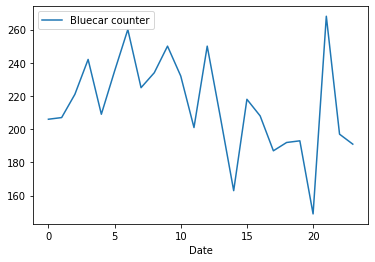

In [ ]:
df[df['City']=='Paris'].pivot_table(index=df['Date'].dt.hour ,values = "Bluecar counter" , aggfunc ='sum').plot()

The most popular hour of pickup of the Bluecars was the one with the least amount of cars in the station as the least count implies that many of the cars have been picked from various stations and are on the road.From 6:00pm -8:00 pm the number of blue cars in the station reduces with the most popular hour being between 7:00pm  - 8:00 pm.


**2.What is the most popular hour for returning cars?**



In [ ]:
df.pivot_table(index=df['Date'].dt.hour ,values = "Bluecar counter" , aggfunc ='sum')

,Bluecar counter
Date,
0,483
1,493
2,559
3,549
4,512
5,552
6,608
7,555
8,472


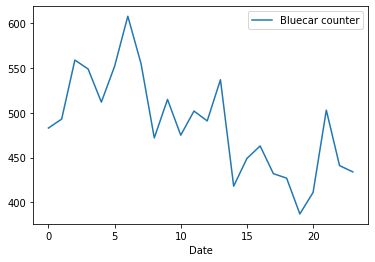

In [ ]:
df.pivot_table(index=df['Date'].dt.hour ,values = "Bluecar counter" , aggfunc ='sum').plot()

The most popular hour for returning cars is between 5:00 - 6:00 am where the number of cars in the station can be seen to steadily increase ultimately peaking at 9:00pm.

**3. What station is the most popular?**

  
*   **Overall?**
*   **At the most popular picking hour?**



  



In [ ]:
df.groupby(['ID','Postal code','City']).resample('M' , on='Date')['Bluecar counter'].count().nlargest(2)

ID                        Postal code  City   Date      
paris-portedemontrouge-8  75014        Paris  2018-04-30    13
paris-courcelles-69       75008        Paris  2018-04-30    11
Name: Bluecar counter, dtype: int64

The most Popular station can be described as the one with the highest count across the entire dataset as this means that there was a high amount of traffic in the station both in terms of picking and returning cars.
In this case it is the Paris-Portedemontrouge-8 staion with the highest count within the dataset.
At the highest picking hour , the most popular station is the Clichylagarenne-Victorhugo-123 .

In [ ]:
df.groupby(['ID']).resample('H' , on='Date')['Bluecar counter'].count().nlargest(10)

ID                                 Date               
paris-pasteurmontparnasse-parking  2018-04-03 09:00:00    3
argenteuil-aristidebriand-1        2018-04-06 06:00:00    2
aubervilliers-forgerons-202        2018-04-04 17:00:00    2
aulnaysousbois-marysebastie-1      2018-04-06 15:00:00    2
bagneux-renecros-65                2018-04-07 19:00:00    2
bievres-gare-12                    2018-04-09 11:00:00    2
clamart-bourcilliere-137           2018-04-09 17:00:00    2
clichylagarenne-victorhugo-123     2018-04-05 20:00:00    2
drancy-henribarbusse-236           2018-04-01 07:00:00    2
issylesmoulineaux-josephfrantz-46  2018-04-07 02:00:00    2
Name: Bluecar counter, dtype: int64

**4.What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?**

 * **Overall?**
 * **At the most popular picking hour?**


In [ ]:
df.groupby(['Postal code','City']).resample('M' , on='Date')['Bluecar counter'].sum().nsmallest(10)

Postal code  City               Date      
78280        Guyancourt         2018-04-30     0
91570        BiÃ¨vres           2018-04-30     0
93390        Clichy-sous-Bois   2018-04-30     0
93800        Epinay-sur-Seine   2018-04-30     0
94370        Sucy-en-Brie       2018-04-30     0
75112        Paris              2018-04-30     4
94100        Saint-Maur         2018-04-30     4
92110        Clichy-la-Garenne  2018-04-30     8
92420        Vaucresson         2018-04-30    10
92210        Clichy la garenne  2018-04-30    12
Name: Bluecar counter, dtype: int64

By resampling the data into a monthly basis the most popular station for picking cars ultimately has the least amount of cars. 
There are several stations in our dataset.